# Projeto Ciência de Dados - Previsão de Vendas

- Nosso desafio é conseguir prever as vendas que vamos ter em determinado período com base nos gastos em anúncios nas 3 grandes redes que a empresa Hashtag investe: TV, Jornal e Rádio

- Base de Dados: https://drive.google.com/drive/folders/1o2lpxoi9heyQV1hIlsHXWSfDkBPtze-V?usp=sharing

### Passo a Passo de um Projeto de Ciência de Dados

- Passo 1: Entendimento do Desafio
- Passo 2: Entendimento da Área/Empresa
- Passo 3: Extração/Obtenção de Dados
- Passo 4: Ajuste de Dados (Tratamento/Limpeza)
- Passo 5: Análise Exploratória
- Passo 6: Modelagem + Algoritmos (Aqui que entra a Inteligência Artificial, se necessário)
- Passo 7: Interpretação de Resultados

#### Importar a Base de dados

In [13]:
import pandas as pd

tabela = pd.read_csv("advertising.csv")
display(tabela)

,TV,Radio,Jornal,Vendas
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5


#### Análise Exploratória
- Vamos tentar visualizar como as informações de cada item estão distribuídas
- Vamos ver a correlação entre cada um dos itens

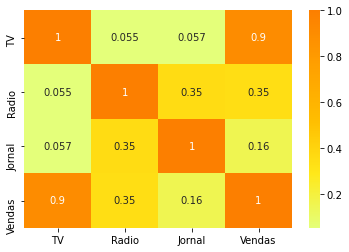

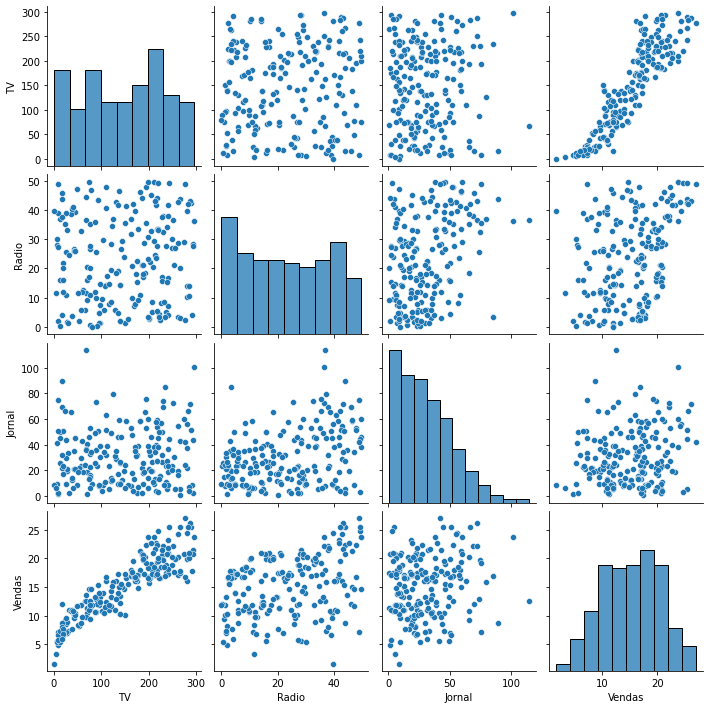

In [29]:
import matplotlib.pyplot as plt 
import seaborn as sns  #Pacotes de graficos
# Para o seaborn funcionar, tem que importar o matplotlib
# Entao precisa importar os dois

sns.heatmap(tabela.corr(), cmap="Wistia", annot=True) 
# Exibe a correlacao da tabela, e vai demonstrar em um grafico de calor
plt.show()
# A correlacao relaciona: se o Numero de TVs sobe e o numero de vendas 
# sobe, ha uma alta correlacao
# ** Nao pode ter uma correlacao forte (0.7). 
# Se for maior doq 0.7, delete-o

sns.pairplot(tabela)
plt.show()



#### Com isso, podemos partir para a preparação dos dados para treinarmos o Modelo de Machine Learning

- Separando em dados de treino e dados de teste

In [28]:
from sklearn.model_selection import train_test_split

# Separar dados de X e de Y

# y - quem vai descobrir
y = tabela["Vendas"]

# x - resto
x = tabela.drop("Vendas", axis=1)

# aplicar o train test split
x_treino, x_teste, y_treino, y_teste = train_test_split(x, y, random_state=1, test_size=0.3)

# O train_test_split espera que passe 4 variaveis

#### Temos um problema de regressão - Vamos escolher os modelos que vamos usar:

- Regressão Linear
- RandomForest (Árvore de Decisão)

In [27]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

modelo_regressaolinear = LinearRegression()
modelo_randomforest = RandomForestRegressor()

modelo_regressaolinear.fit(x_treino, y_treino)
modelo_randomforest.fit(x_treino, y_treino) 
# O modelo ja passa o 80% 20% pro test split
RandomForestRegressor()

RandomForestRegressor()

#### Teste da AI e Avaliação do Melhor Modelo

- Vamos usar o R² -> diz o % que o nosso modelo consegue explicar o que acontece

In [32]:
previsao_regressaolinear = modelo_regressaolinear.predict(x_teste)
previsao_randomforest = modelo_randomforest.predict(x_teste)
# R² - Vai de 0% a 100% (Mostra o quao proximo foi essa metrica de precisao)
        # Quanto maior, melhor

from sklearn import metrics

print(metrics.r2_score(y_teste, previsao_regressaolinear))
print(metrics.r2_score(y_teste, previsao_randomforest))


0.9071151423684272
0.96359602678414


#### Visualização Gráfica das Previsões

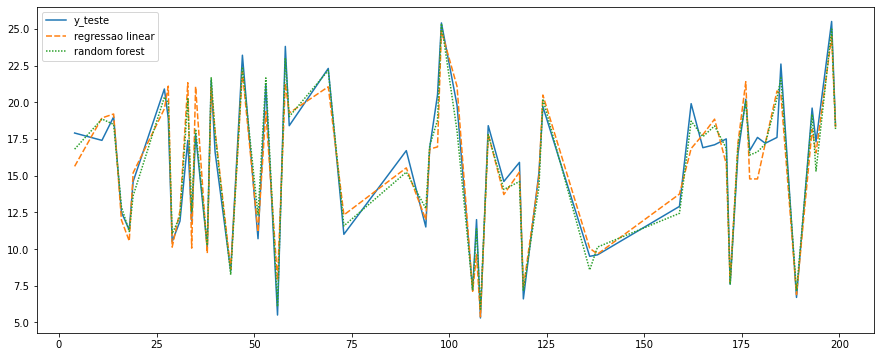

In [34]:
# randomforest foi o melhor
tabela_auxiliar = pd.DataFrame()
tabela_auxiliar["y_teste"] = y_teste
tabela_auxiliar["regressao linear"] = previsao_regressaolinear
tabela_auxiliar["random forest"] = previsao_randomforest

plt.figure(figsize=(15, 6))
sns.lineplot(data=tabela_auxiliar)
plt.show()

In [ ]:
# Como fazer uma nova previsao: 
# importar a nova tabela com pandas (a nova tabela tem que ter os dados 
                                            # de TV, Radio e Jornal)
# previsao = modelo_randomforest.predict(nova_tabela)
# print(previsao)


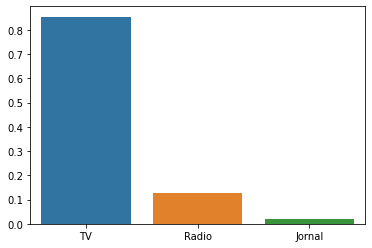

In [36]:
sns.barplot(x=x_treino.columns, y=modelo_randomforest.feature_importances_)
plt.show()